In [1]:
import json
import os
import random as rnd

import dataset_utils.utils_coco as utils
import dataset_utils.visualize_coco as visualize

In [2]:
paths = {}
with open("dataset_utils/coco_paths.json", 'r') as f:
    paths = json.load(f)
    

paths["DATASET_IMAGES_PATH_TRAIN"] = os.path.join(paths["HOME_PATH"], paths["DATASET_IMAGES_PATH"], "train2017")
paths["DATASET_IMAGES_PATH_VAL"] = os.path.join(paths["HOME_PATH"], paths["DATASET_IMAGES_PATH"], "val2017")
paths["DATASET_IMAGES_PATH_TEST"] = os.path.join(paths["HOME_PATH"], paths["DATASET_IMAGES_PATH"], "test2017")

paths["DATASET_ANNOTATIONS_PATH_TRAIN"] = os.path.join(paths["HOME_PATH"], paths["DATASET_ANNOTATIONS_PATH"], "person_keypoints_train2017.json")
paths["DATASET_ANNOTATIONS_PATH_VAL"] = os.path.join(paths["HOME_PATH"], paths["DATASET_ANNOTATIONS_PATH"], "person_keypoints_val2017.json")
paths["DATASET_ANNOTATIONS_PATH_TEST"] = os.path.join(paths["HOME_PATH"], paths["DATASET_ANNOTATIONS_PATH"], "person_keypoints_test-dev-2017.json")

In [3]:
annotations = {}
annotations["val"] = utils.load_annotations(paths["DATASET_ANNOTATIONS_PATH_VAL"])
annotations["test"] = utils.load_annotations(paths["DATASET_ANNOTATIONS_PATH_TEST"])
annotations["train"] = utils.load_annotations(paths["DATASET_ANNOTATIONS_PATH_TRAIN"])

keypoint_names = annotations["val"]["categories"][0]["keypoints"]
keypoint_connections = annotations["val"]["categories"][0]["skeleton"]

### Train set

In [4]:
keypoints, keypounts_visible, keypounts_not_visible, nannotations = utils.get_stats(annotations["train"])

Number of images in dataset: 118287
Number of images in dataset with annotation: 56599

Annotations: 149813
Annotations average in one image : 2.65

Visible joints: 1456841 (88.71%)
Nonvisible joints: 185442 (11.29%)


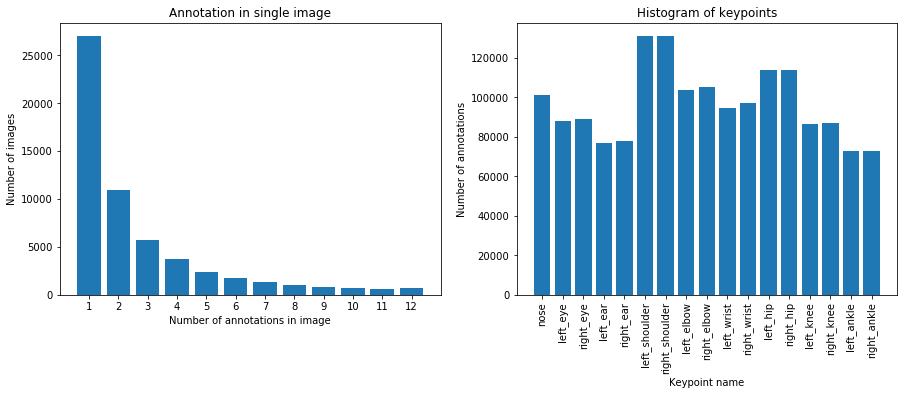

In [5]:
visualize.histograms(keypoints, keypounts_visible, keypounts_not_visible, nannotations)

### Validation set

In [6]:
keypoints, keypounts_visible, keypounts_not_visible, nannotations = utils.get_stats(annotations["val"])

Number of images in dataset: 5000
Number of images in dataset with annotation: 2346

Annotations: 6352
Annotations average in one image : 2.71

Visible joints: 59850 (87.74%)
Nonvisible joints: 8365 (12.26%)


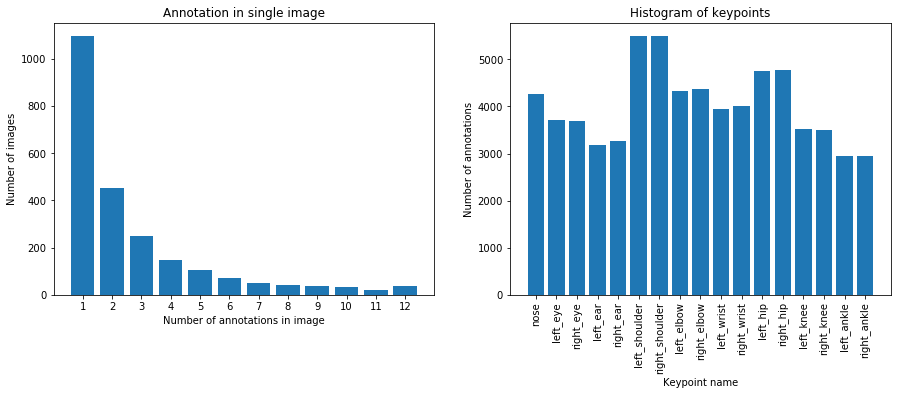

In [7]:
visualize.histograms(keypoints, keypounts_visible, keypounts_not_visible, nannotations)

### Test set

In [8]:
print("Number of images in dataset: {}".format(len(annotations["test"]["images"])))

Number of images in dataset: 15988


### Sample images

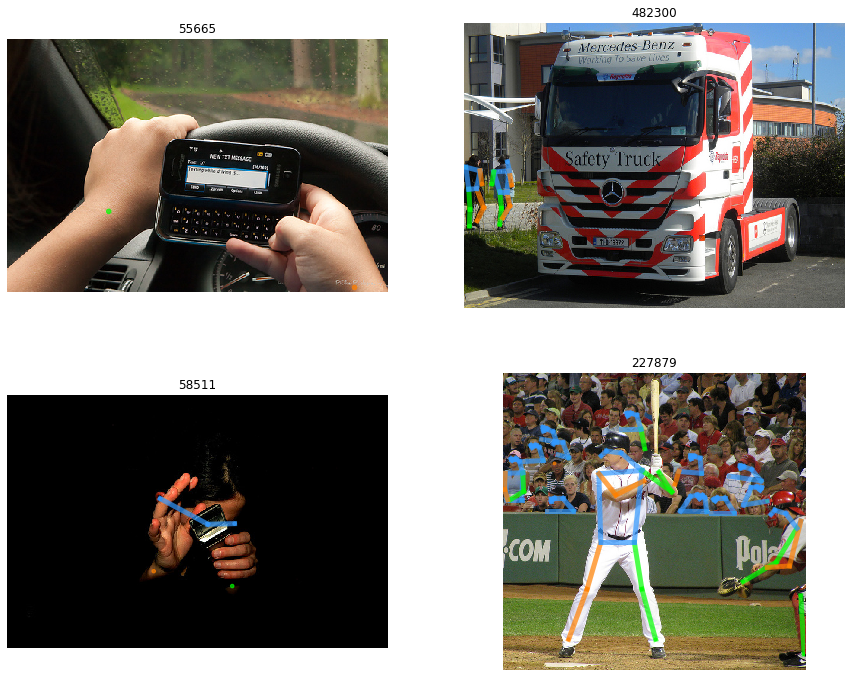

In [9]:
visualize.random_images(annotations["train"], paths["DATASET_IMAGES_PATH_TRAIN"], 4)

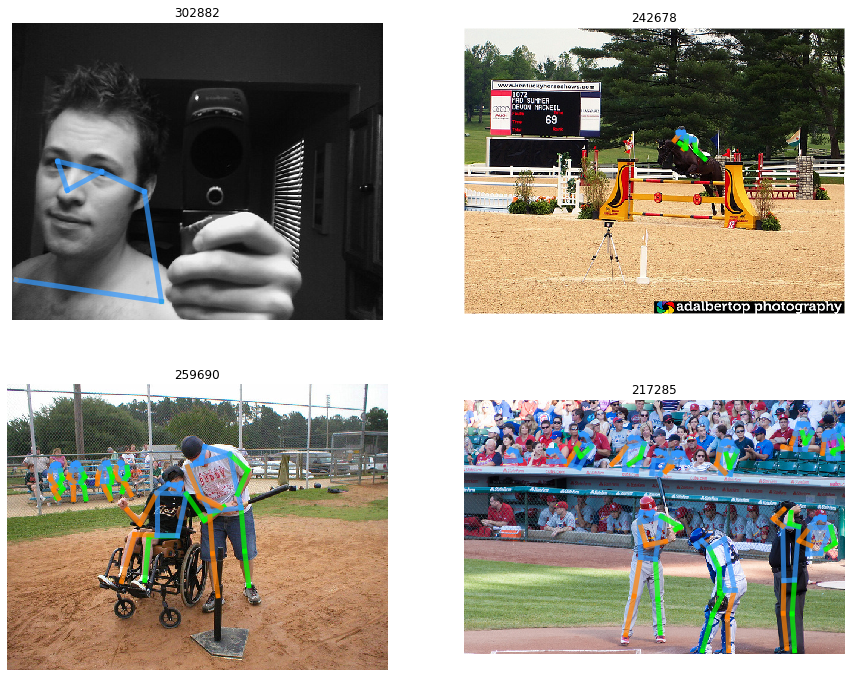

In [10]:
visualize.random_images(annotations["val"], paths["DATASET_IMAGES_PATH_VAL"], 4)

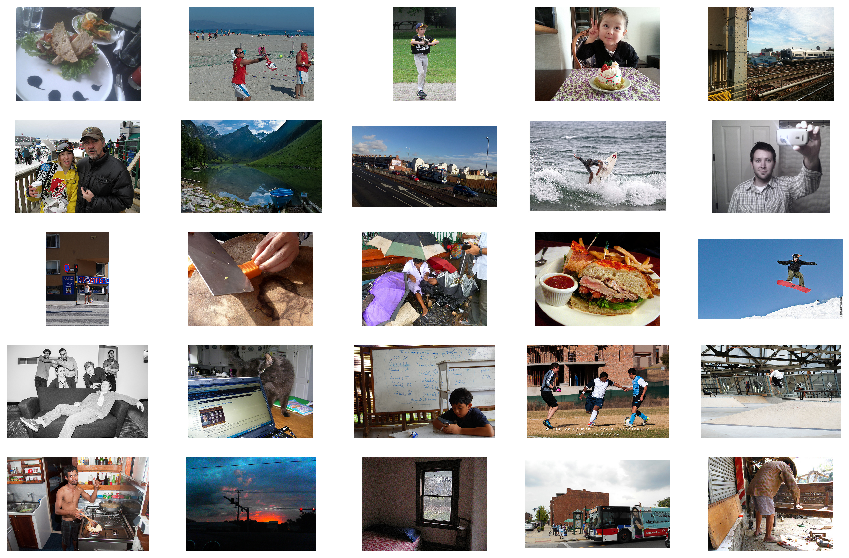

In [11]:
img = []
n = 25
idx = rnd.sample(range(0, len(annotations["test"]["images"])), n)
for i in idx:
    img.append(annotations["test"]["images"][i])

visualize.show_image(img, paths["DATASET_IMAGES_PATH_TEST"])